# Class 12: Maps



In [1]:
import YData

# YData.download.download_class_code(14)   # get class code    
# YData.download.download_class_code(14, True)  # get the code with the answers 

YData.download_data("dennys.csv")

YData.download.download_data("States_shapefile.geojson")
YData.download.download_data("state_demographics.csv")
YData.download.download_data("ne_110m_graticules_10.prj")
YData.download.download_data("ne_110m_graticules_10.shp")
YData.download.download_data("ne_110m_graticules_10.shx")
YData.download.download_data("ne_110m_graticules_10.dbf")


The file `dennys.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `States_shapefile.geojson` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `state_demographics.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `ne_110m_graticules_10.prj` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `ne_110m_graticules_10.shp` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `ne_110m_graticules_10.shx` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `ne_110m_graticules_10.dbf` already exists.
If you would like to download a new copy of the file, 

If you are using colabs, you should install the YData packages by uncommenting and running the code below and run the code below to mount the your google drive.

In [2]:
# !pip install https://github.com/lederman/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Review of seaborn!

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

I.e., it is built on top of of matplotlib but produces better looking plots that are easier to create. 

Let's start by examining different themes which can produce better looking plots. We can do this using the `sns.set_theme()` method. 


In [4]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()   # default style is 'darkgrid')
#sns.set_theme(style='whitegrid')

# Side note: Matplotlib also has themes
# plt.style.available
# plt.style.use('fivethirtyeight')


### Penguins!  

Let's get a little more practice with seaborn by continuing to explore the penguins data set. 



In [5]:
# Let's look at some penguins
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Plotting a single quantitative variable using sns.displot()

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


#### Warm-up exercise

Please create a `sns.displot()` to create a visulation of *flipped length*, where each *species* is in a different color (i.e., different hue). Also, experiment with the "kind" of visualization and choose the kind you think creates the best visualization. 


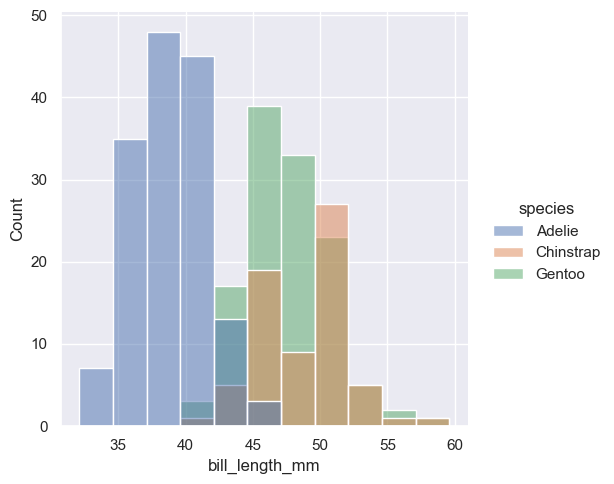

In [6]:
# plot the flipper length
sns.displot(data = penguins, 
            x="bill_length_mm", 
            hue="species", 
            kind="hist");  # Experiment with "hist", "kde" and "ecdf"

### Pairs plots

One of the most useful visualizations for exploring the relationships between several quantitative variables is to create a "pairs plot" which creates a series of scatter plots between all quantitative variables in the data.  We can do this in seaborn using the `sns.pairplot(data)` function!


Use the `pairplot()` function to visualize the relationships between all columns in the `penguins` DataFrame. Also, make each species have a different color. 



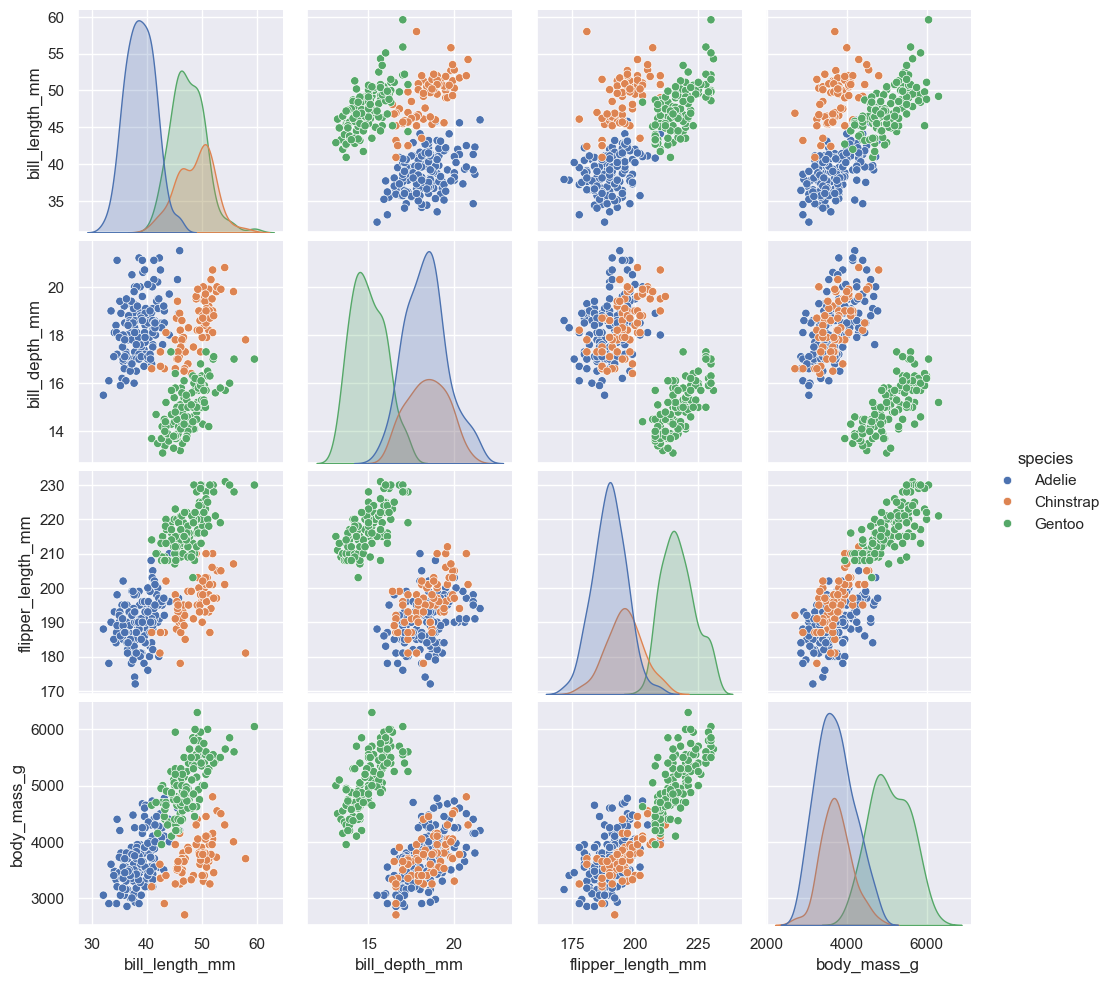

In [7]:
# Create pair plots for the different varaibles in the penguins data set

sns.pairplot(penguins, hue = "species");


<img src = "https://i.imgflip.com/1ezfdq.jpg">

## 1. Spatial mapping with geopandas

Visualizing spatial data through maps is another powerful way to see trends in data. There are several mapping packages in Python. Here we will use the geopandas package to create maps. 

The geopandas package defines a geopandas DataFrame, which is the same as a pandas DataFrame but has an additional column called `geometry` which specifies geographic information. 

Let's explore this now!


### Visualizing boundaries

Let's start by looking some geopanda DataFrames and visualizing some geometric boundaries.



In [8]:
import geopandas as gpd

# see which maps come with geopandas
gpd.datasets.available
# Oh no! They don't provide datasets anymore!

[]

Let's get a geopandas DataFrame that has th countries in the world...

In [9]:
# View the world geopandas DataFrame


# read data into a geodataframe
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
# In previous versions of Pandas, the datasert was included with the package
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# print the data type
print(type(world))

# look at the first few rows of the data
world.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


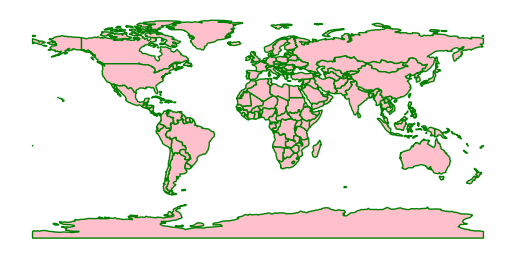

In [10]:
# Plot a world map with particular properties

ax = world.plot(color = "pink", edgecolor = "green");

ax.set_axis_off();


In [11]:
world.query("ADMIN == 'United States of America'")

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [12]:
world.query("SOVEREIGNT == 'United States of America'")

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
45,Admin-0 country,1,5,United States of America,US1,1,2,Dependency,1,Puerto Rico,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-66.28243 18.51476, -65.7713 18.4266..."


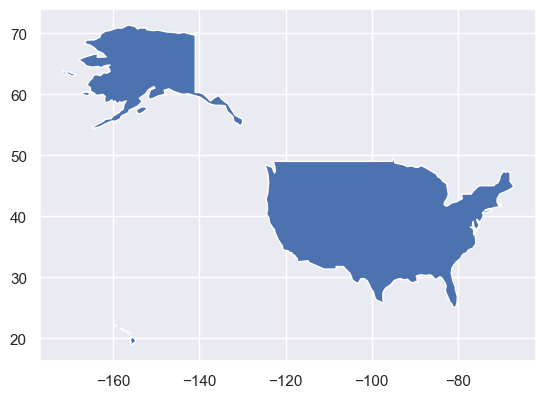

In [13]:
# Plot just the United States

world.query("ADMIN == 'United States of America'").plot();


### Coordinate reference systems and projections

A coordinate reference system (CRS) is a framework used to precisely measure locations on the surface of the Earth as coordinates. The goal of any spatial reference system is to create a common reference frame in which locations can be measured precisely and consistently as coordinates, which can then be shared unambiguously, so that any recipient can identify the same location that was originally intended by the originator.

There are two different types of coordinate reference systems: Geographic Coordinate Systems and Projected Coordinate Systems. [Projected coordinate systems](https://en.wikipedia.org/wiki/List_of_map_projections) map 3D coordinates into a 2D plane so they can be plotted. Different projected coordiate systems perserve different properties, such as keeping all angles intact which is usefor for navigation (e.g., the Mercator projection) or keeping the size of land areas intact (e.g., the Eckert IV projection). 

A detailed discussion of CRS is beyond the scope of the class. But for the purposes of this class, it is just important that all layers in a map are using the same project (otherwise, for example, data points representing cities and the underlying spatial map won't line up). 

Let's very briefly explore different map projections... 


In [14]:
# Read Graticules (lines on a map)
graticules = gpd.read_file("ne_110m_graticules_10.shp")
print(graticules.crs)
graticules.head(3)

EPSG:4326


,degrees,direction,display,dd,ScaleRank,geometry
0,80,N,80 N,80.0,6,"LINESTRING (180 79.99848, 179.99664 79.99848, ..."
1,70,N,70 N,70.0,6,"LINESTRING (180 69.99847, 179.99664 69.99847, ..."
2,60,N,60 N,60.0,6,"LINESTRING (180 59.99866, 179.99664 59.99866, ..."


EPSG:4326


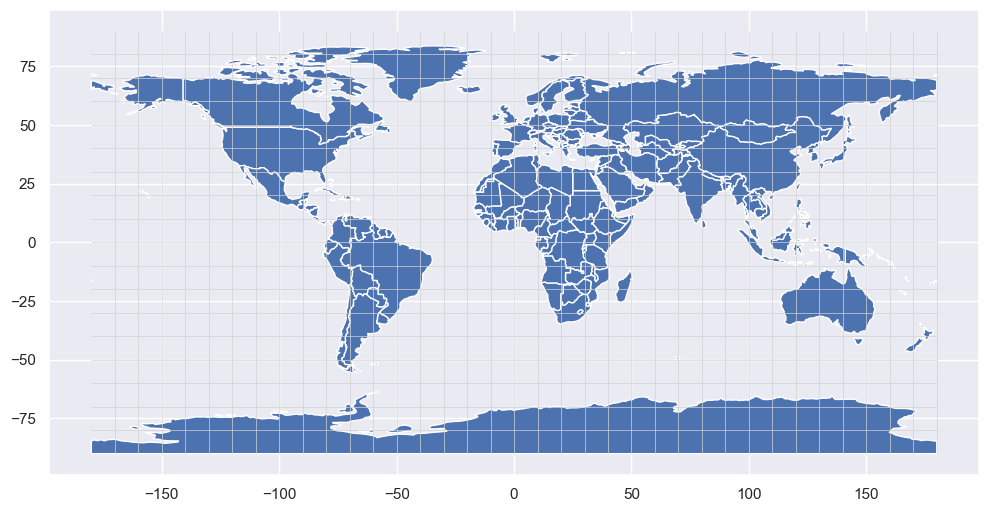

In [15]:
# Web Mercator projection - perserves angles (EPSG:4326 projection)

print(world.crs) # print the default CRS


# plot the map
fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax = ax);
graticules.plot(ax=ax, color="lightgray", linewidth=0.5);

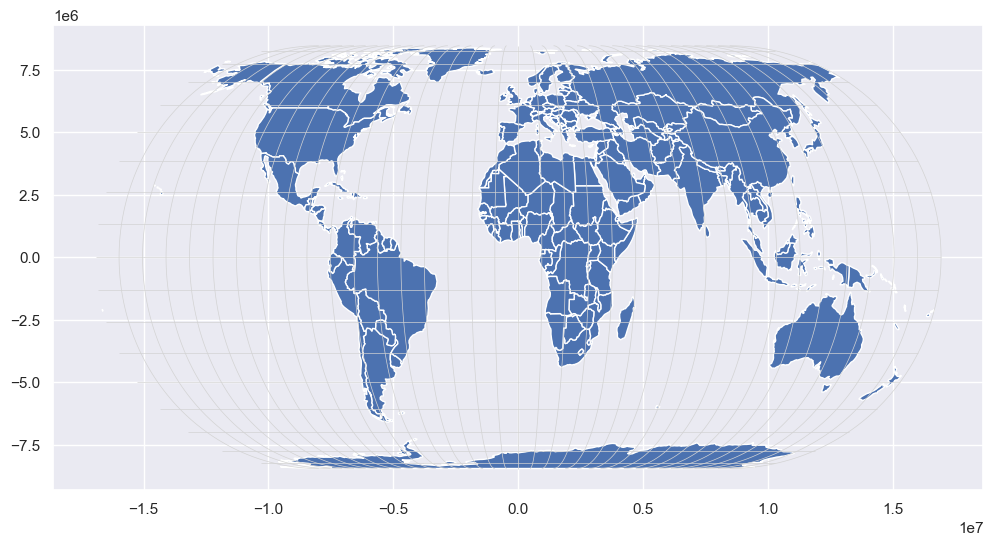

In [16]:
# Eckert IV is an equal-area projection  ("ESRI:54012")

fig, ax = plt.subplots(figsize=(12,10))
world.to_crs("ESRI:54012").plot(ax = ax);
graticules.to_crs("ESRI:54012").plot(ax=ax, color="lightgray", linewidth=0.5);

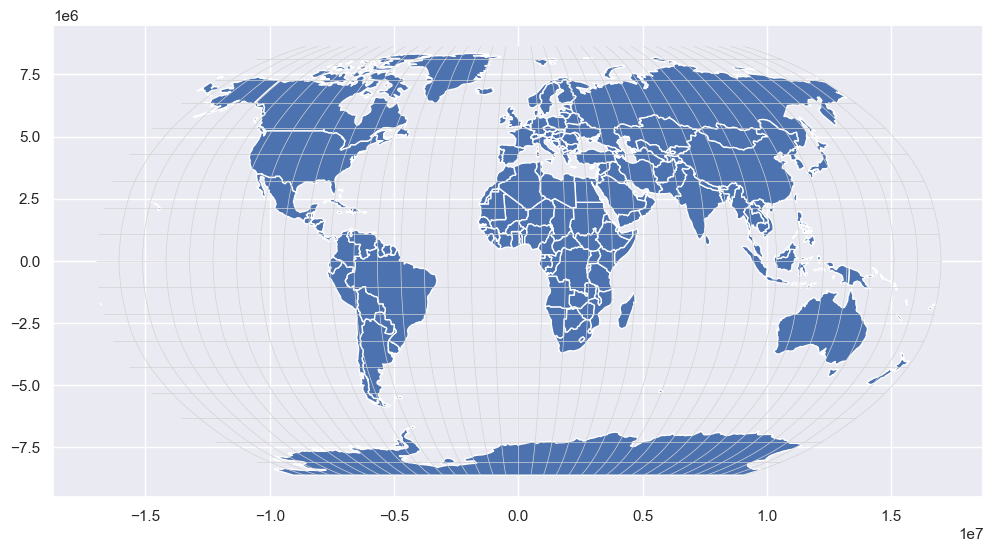

In [17]:
# Robinson projection - neither equal-area nor conformal ("ESRI:54030") 

fig, ax = plt.subplots(figsize=(12,10))
world.to_crs("ESRI:54030").plot(ax = ax);
graticules.to_crs("ESRI:54030").plot(ax=ax, color="lightgray", linewidth=0.5);

To learn more about "What your favorite map projection says about you" see: https://xkcd.com/977/

### Maps with layers and markers

We can also plot points on a map. When doing so, it's important that the points and the underlying map use the same coordinate reference system (CRS).

Let's add Denny's locations to the map of the United States!


In [18]:
# Let's start by getting a map of just the United States

state_map = world.query("ADMIN == 'United States of America'")

state_map

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


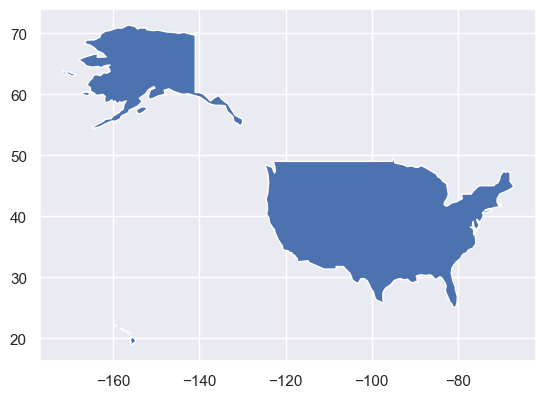

In [19]:
# visualize just the United States

state_map.plot();


In [20]:
# Get the coordinate reference system (CRS) for our map

print(state_map.crs)

EPSG:4326


Let's now load our Denny's data!

In [21]:
# Let's load our Denny's data
dennys = pd.read_csv("dennys.csv")
dennys.head(3)

,Unnamed: 0,address,city,state,zip,longitude,latitude
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366


To convert longitude and latitude coordinates into geometric objects; i.e., we will convert them into Shaply objects.  We can use the `gpd.points_from_xy(long, lat)` function. 

In [22]:
# Let's convert our longitude and latitude coordinates into geometric (Shapely) objects 

dennys_geometries = gpd.points_from_xy(dennys["longitude"], dennys["latitude"])
dennys_geometries[0:5]

<GeometryArray>
[<POINT (-149.877 61.195)>,  <POINT (-149.809 61.21)>,
  <POINT (-147.76 64.837)>,  <POINT (-85.468 32.603)>,
  <POINT (-86.832 33.562)>]
Length: 5, dtype: geometry

In [23]:
# Let's now convert out data into a geopandas DataFrame

dennys_gpd = gpd.GeoDataFrame(dennys, geometry=dennys_geometries)
dennys_gpd.head(3)

,Unnamed: 0,address,city,state,zip,longitude,latitude,geometry
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953,POINT (-149.8767 61.1953)
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097,POINT (-149.809 61.2097)
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366,POINT (-147.76 64.8366)


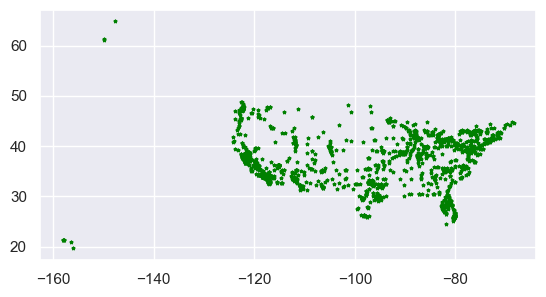

In [24]:
# We can plot the location of the Denny's using the plot function

dennys_gpd.plot(marker='*', color='green', markersize=5);


In [25]:
# Let's check the CRS

print(dennys_gpd.crs)


None


Before plotting data, we should set the appropriate coordinate reference system (CRS). This is partlcularly imporant when we are combining different layers on a map, such as putting city locations on the map that has the outlines of regional borders. 

The CRS that uses longitude and latitude coordinates is the [World Geodetic System 1984 (WGS84)](https://epsg.io/4326). This system is often referred to by its EPSG Geodetic Parameter Dataset code which is `4326`. 

Thus, we should set the set coordinate system to be EPSG 4326. We can do this using the method `.set_crs(4326)`. Let's set this on our `dennys_gpd` DataFrame. 


In [26]:
# Let's set the CRS to match the CRS of our map (which is EPSG 4326)

dennys_gpd = dennys_gpd.set_crs(4326)

print(dennys_gpd.crs)

dennys_gpd.head(3)

EPSG:4326


,Unnamed: 0,address,city,state,zip,longitude,latitude,geometry
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953,POINT (-149.8767 61.1953)
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097,POINT (-149.809 61.2097)
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366,POINT (-147.76 64.8366)


Now that we have our Denny's location in the same coordinate system as our map, we can add the points to the map. 

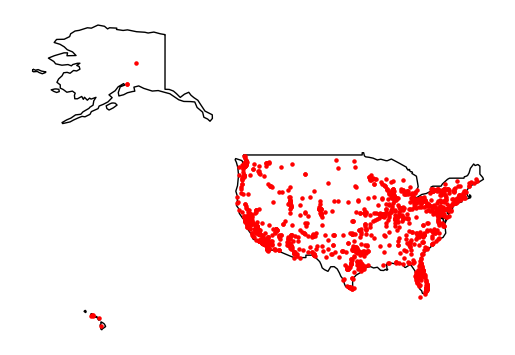

In [27]:
#state_map = gpd.read_file("States_shapefile.geojson")

base = state_map.plot(color='white', edgecolor='black')

ax = dennys_gpd.plot(ax=base, color='red', markersize=5);

ax.set_axis_off();

### Choropleth maps

In choropleth maps, predefined regions are filled in with colors based values of interest. 

Typically to create a choropleth map we join data of interest onto a map. 

Let's explrore this now...


In [28]:
import plotly.express as px

gapminder_2007 = px.data.gapminder().query("year == 2007")   # the plotly package (which we skipped for now) comes with the gapminder data

gapminder_2007.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [29]:
# Join the gapminder data onto our world map

world2 = world.merge(gapminder_2007, left_on = "ADMIN", right_on = "country")

world2.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_UA,geometry,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,Americas,2007,80.653,33390141,36319.235010,CAN,124
1,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,Asia,2007,70.650,223547000,3540.651564,IDN,360
2,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...",Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


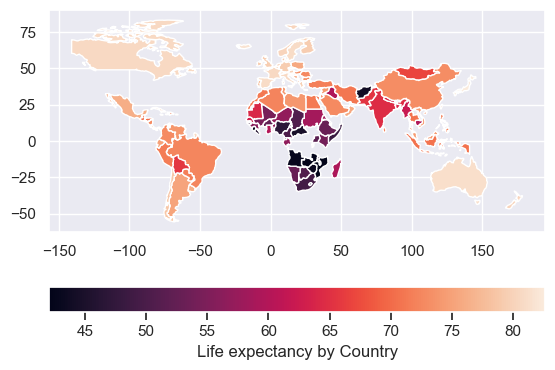

In [30]:
# Plot a choropleth map of life expectancy

world2.plot(column='lifeExp', legend = True,
           legend_kwds={'label': "Life expectancy by Country",
                        'orientation': "horizontal"});

<Axes: >

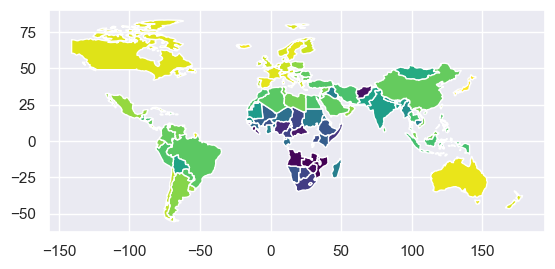

In [31]:
# Change the color scale

world2.plot(column='lifeExp', cmap='viridis')  #cmap='OrRd');

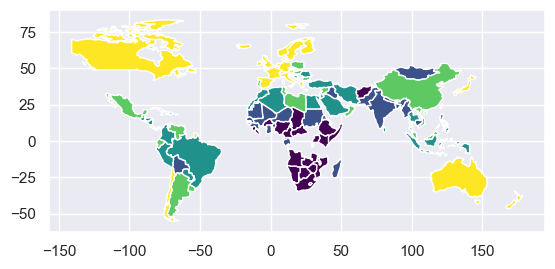

In [32]:
# We can plot quantiles

#world2.plot(column='lifeExp', cmap='OrRd', scheme='quantiles');

world2.plot(column='lifeExp', cmap='viridis', scheme='quantiles');


#### BUT WAIT! Are we missing some countries??? Let's try to find out way.

New commands we'll try here are not for the exam.

In [33]:
# Wait! are some countries missing???
# Let's look for Sudan and South Sudan.
display(gapminder_2007[gapminder_2007["country"].str.startswith("S")])
display(world[world["ADMIN"].str.startswith("S")])

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1307,Sao Tome and Principe,Africa,2007,65.528,199579,1598.435089,STP,678
1319,Saudi Arabia,Asia,2007,72.777,27601038,21654.831940,SAU,682
1331,Senegal,Africa,2007,63.062,12267493,1712.472136,SEN,686
1343,Serbia,Europe,2007,74.002,10150265,9786.534714,SRB,688
1355,Sierra Leone,Africa,2007,42.568,6144562,862.540756,SLE,694
1367,Singapore,Asia,2007,79.972,4553009,47143.179640,SGP,702
1379,Slovak Republic,Europe,2007,74.663,5447502,18678.314350,SVK,703
1391,Slovenia,Europe,2007,77.926,2009245,25768.257590,SVN,705
1403,Somalia,Africa,2007,48.159,9118773,926.141068,SOM,706
1415,South Africa,Africa,2007,49.339,43997828,9269.657808,ZAF,710


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
12,Admin-0 country,1,6,Somalia,SOM,0,2,Sovereign country,1,Somalia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ..."
14,Admin-0 country,1,3,Sudan,SDN,0,2,Sovereign country,1,Sudan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
25,Admin-0 country,1,2,South Africa,ZAF,0,2,Sovereign country,1,South Africa,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
42,Admin-0 country,1,4,Suriname,SUR,0,2,Sovereign country,1,Suriname,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375..."
51,Admin-0 country,1,3,Senegal,SEN,0,2,Sovereign country,1,Senegal,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-16.71373 13.59496, -17.12611 14.373..."
64,Admin-0 country,1,4,Sierra Leone,SLE,0,2,Sovereign country,1,Sierra Leone,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271..."
96,Admin-0 country,1,2,South Korea,KOR,0,2,Sovereign country,1,South Korea,...,None,None,None,None,None,None,None,None,None,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."
108,Admin-0 country,1,3,Syria,SYR,0,2,Sovereign country,1,Syria,...,None,None,None,None,None,None,None,None,None,"POLYGON ((35.71992 32.70919, 35.7008 32.71601,..."
110,Admin-0 country,1,3,Sweden,SWE,0,2,Sovereign country,1,Sweden,...,None,None,None,None,None,None,None,None,None,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
127,Admin-0 country,1,4,Switzerland,CHE,0,2,Sovereign country,1,Switzerland,...,None,None,None,None,None,None,None,None,None,"POLYGON ((9.59423 47.52506, 9.63293 47.3476, 9..."


In [34]:
# Which entries didn't make it?
world[~world["ADMIN"].isin(world2["ADMIN"])]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
5,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,1,Uzbekistan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,Admin-0 country,1,2,Papua New Guinea,PNG,0,2,Sovereign country,1,Papua New Guinea,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
11,Admin-0 country,1,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,1,Democratic Republic of the Congo,...,None,None,None,None,None,None,None,None,None,"POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2..."
18,Admin-0 country,1,2,Russia,RUS,0,2,Sovereign country,1,Russia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((178.7253 71.0988, 180 71.51571..."
19,Admin-0 country,1,4,The Bahamas,BHS,0,2,Sovereign country,1,The Bahamas,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-78.98 26.79, -78.51 26.87, -7..."


In [35]:
#Let's look for the US
display(gapminder_2007[gapminder_2007["country"].str.startswith("U")])
display(world[world["ADMIN"].str.startswith("U")])

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1595,Uganda,Africa,2007,51.542,29170398,1056.380121,UGA,800
1607,United Kingdom,Europe,2007,79.425,60776238,33203.261280,GBR,826
1619,United States,Americas,2007,78.242,301139947,42951.653090,USA,840
1631,Uruguay,Americas,2007,76.384,3447496,10611.462990,URY,858


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
6,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,1,Uzbekistan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
28,Admin-0 country,1,4,Uruguay,URY,0,2,Sovereign country,1,Uruguay,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
84,Admin-0 country,1,4,United Arab Emirates,ARE,0,2,Sovereign country,1,United Arab Emirates,...,None,None,None,None,None,None,None,None,None,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
112,Admin-0 country,1,3,Ukraine,UKR,0,2,Sovereign country,1,Ukraine,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."
143,Admin-0 country,1,2,United Kingdom,GB1,1,2,Country,1,United Kingdom,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."
168,Admin-0 country,1,3,Uganda,UGA,0,2,Sovereign country,1,Uganda,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 31.86617 -1.02736, 3..."


In [36]:
# What is that SOVEREIGNT thing?
display(world[world["SOVEREIGNT"].str.startswith("United States")])

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
45,Admin-0 country,1,5,United States of America,US1,1,2,Dependency,1,Puerto Rico,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-66.28243 18.51476, -65.7713 18.4266..."


In [37]:
# Codes to be more standard. 
# Would this work better?
world3 = world.merge(gapminder_2007, left_on = "SOV_A3", right_on = "iso_alpha")
world3

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_UA,geometry,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Tanzania,Africa,2007,52.517,38139640,1107.482182,TZA,834
1,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,Americas,2007,80.653,33390141,36319.235010,CAN,124
2,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,Asia,2007,70.650,223547000,3540.651564,IDN,360
3,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...",Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
4,Admin-0 country,1,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",Chile,Americas,2007,78.553,16284741,13171.638850,CHL,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Admin-0 country,1,3,Rwanda,RWA,0,2,Sovereign country,1,Rwanda,...,None,"POLYGON ((30.4191 -1.13466, 30.81613 -1.69891,...",Rwanda,Africa,2007,46.242,8860588,863.088464,RWA,646
118,Admin-0 country,1,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,1,Bosnia and Herzegovina,...,None,"POLYGON ((18.56 42.65, 17.67492 43.02856, 17.2...",Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803,BIH,70
119,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,Europe,2007,74.002,10150265,9786.534714,SRB,688
120,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",Montenegro,Europe,2007,74.543,684736,9253.896111,MNE,499


In [38]:
# Here, the numerial code works a little better
world4 = world.copy()
world4["ISO_N3_STR"] = world["ISO_N3"].astype("int64")
world4["ISO_N3_STR"]
world5 = world4.merge(gapminder_2007, left_on = "ISO_N3_STR", right_on = "iso_num", how="inner")
world5

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,geometry,ISO_N3_STR,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",834,Tanzania,Africa,2007,52.517,38139640,1107.482182,TZA,834
1,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",124,Canada,Americas,2007,80.653,33390141,36319.235010,CAN,124
2,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",840,United States,Americas,2007,78.242,301139947,42951.653090,USA,840
3,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",360,Indonesia,Asia,2007,70.650,223547000,3540.651564,IDN,360
4,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...",32,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Admin-0 country,1,3,Rwanda,RWA,0,2,Sovereign country,1,Rwanda,...,"POLYGON ((30.4191 -1.13466, 30.81613 -1.69891,...",646,Rwanda,Africa,2007,46.242,8860588,863.088464,RWA,646
128,Admin-0 country,1,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,1,Bosnia and Herzegovina,...,"POLYGON ((18.56 42.65, 17.67492 43.02856, 17.2...",70,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803,BIH,70
129,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",688,Serbia,Europe,2007,74.002,10150265,9786.534714,SRB,688
130,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",499,Montenegro,Europe,2007,74.543,684736,9253.896111,MNE,499


In [39]:
world2 = world5

### Anorther choropleth map example

Let's fit a choropleth map examining which states in the USA are growing in terms of people having lots of childern. 

Any thoughts on which state this might be? 

To start, let's load a map with the outlines of the states in the USA, and load demographic data.

In [40]:
state_map = gpd.read_file("States_shapefile.geojson")

print(state_map.crs)

state_map.head(3)

EPSG:4326


,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.9807, -85.11515 31.9074..."
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."


In [41]:
# load demographic data on the states

state_demographics = pd.read_csv("state_demographics.csv")
state_demographics.head(3)

,State,under_5,over_64,bachelors_degree,total
0,Alabama,295811.997,741954.681,1095959.202,4849377
1,Alaska,54518.168,69252.808,202601.300,736732
2,Arizona,430814.976,1070305.956,1810769.196,6731484


In [42]:
# In order to join the DataFrames, we need to make sure the states have the same capitalization

state_demographics2 = state_demographics.copy()
state_demographics2["State"] = state_demographics["State"].apply(str.upper)

state_demographics2.head()

,State,under_5,over_64,bachelors_degree,total
0,ALABAMA,295811.997,741954.681,1.095959e+06,4849377
1,ALASKA,54518.168,69252.808,2.026013e+05,736732
2,ARIZONA,430814.976,1070305.956,1.810769e+06,6731484
3,ARKANSAS,192813.985,465719.933,5.962402e+05,2966369
4,CALIFORNIA,2522162.500,5005522.500,1.191237e+07,38802500


In [43]:
# Join the demographic information on to the the USA map

state_map_demo = state_map.merge(state_demographics2, 
                                 left_on = "State_Name", right_on = "State")
state_map_demo.head(3)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry,State,under_5,over_64,bachelors_degree,total
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.9807, -85.11515 31.9074...",ALABAMA,295811.997,741954.681,1095959.202,4849377
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",ALASKA,54518.168,69252.808,202601.300,736732
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",ARIZONA,430814.976,1070305.956,1810769.196,6731484


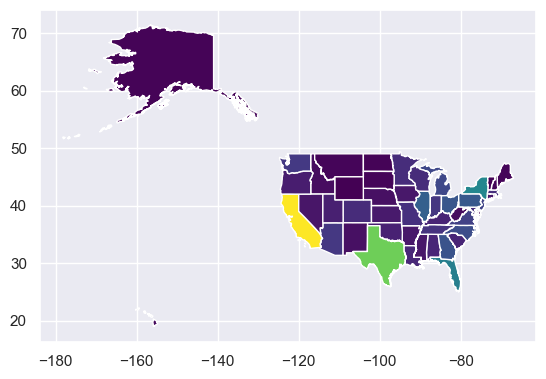

In [44]:
# Let's plot the map 

state_map_demo.plot(column = "under_5", cmap='viridis');


Is there anything [wrong with this map](https://xkcd.com/1138/)? 

In [45]:
# Let's look at the proportion of people under the age of 5

state_map_demo2 = state_map_demo.copy()

state_map_demo2["percent_under_5"] = 100 * state_map_demo["under_5"]/state_map_demo["total"]

state_map_demo2.head(3)


,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry,State,under_5,over_64,bachelors_degree,total,percent_under_5
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.9807, -85.11515 31.9074...",ALABAMA,295811.997,741954.681,1095959.202,4849377,6.1
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",ALASKA,54518.168,69252.808,202601.300,736732,7.4
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",ARIZONA,430814.976,1070305.956,1810769.196,6731484,6.4


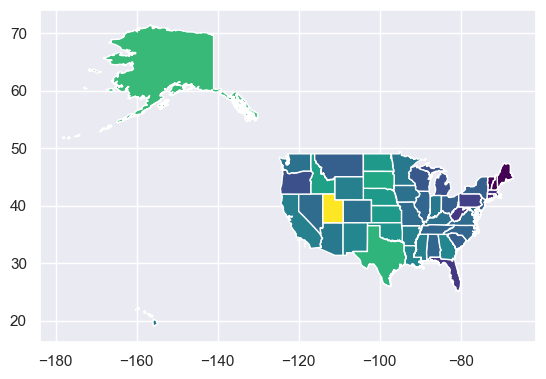

In [46]:
# Let's plot the new map

state_map_demo2.plot(column = "percent_under_5", cmap='viridis');


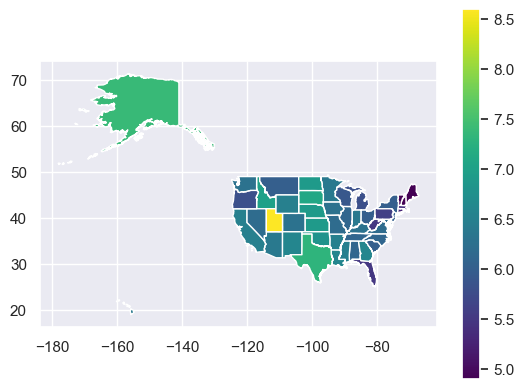

In [47]:
# But what does it mean?
state_map_demo2.plot(column = "percent_under_5", cmap='viridis',legend=True);
